In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the CSV files
cab_data = pd.read_csv('/Users/haoyuechang/Downloads/DataSets-main/Cab_Data.csv')
customer_id = pd.read_csv('/Users/haoyuechang/Downloads/DataSets-main/Customer_ID.csv')
transaction_id = pd.read_csv('/Users/haoyuechang/Downloads/DataSets-main/Transaction_ID.csv')
city = pd.read_csv('/Users/haoyuechang/Downloads/DataSets-main/City.csv')

In [10]:

# Display the column names in each DataFrame
print("Cab_Data columns:", cab_data.columns)
print("Customer_ID columns:", customer_id.columns)
print("Transaction_ID columns:", transaction_id.columns)
print("City columns:", city.columns)



Cab_Data columns: Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Customer_ID columns: Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Transaction_ID columns: Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
City columns: Index(['City', 'Population', 'Users'], dtype='object')


In [19]:
#Understand data types
cab_data.info()
customer_id.info()
transaction_id.info()
city.info()
#cab_data:7 columns and 359392 rows,float64(3), int64(2), object(2);
#customer_id:4 columns, 49171 rows, int64(3), object(1)
#transaction_id:3 columns, 440098 rows, int64(2), object(1)
#city:3 columns, 20 rows, object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [30]:
#missing values checking
cab_data.isnull().sum()
#no missing values

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [31]:
customer_id.isnull().sum()
#no missing values

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [32]:
transaction_id.isnull().sum()
#no missing values

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [33]:
city.isnull().sum()
#no missing values

City          0
Population    0
Users         0
dtype: int64

In [39]:
#Identify and handle any duplicate records in the datasets
duplicates1 = cab_data.duplicated()
duplicate_rows1 = cab_data[duplicates1]
cab_data.drop_duplicates(inplace=True)

In [43]:
duplicates2 = customer_id.duplicated(subset=['Customer ID'])
duplicate_rows2 = customer_id[duplicates2]
customer_id.drop_duplicates(inplace=True)

In [46]:
duplicates3 = transaction_id.duplicated()
duplicate_rows3 = transaction_id[duplicates3]
transaction_id.drop_duplicates(inplace=True)

In [47]:
duplicates4 = city.duplicated()
duplicate_rows4 = city[duplicates4]
city.drop_duplicates(inplace=True)

In [51]:
#merge the data
import pandas as pd

# Load the datasets into DataFrames

# Merge Transaction_Id.csv with Customer_ID.csv
merged_df_1 = pd.merge(transaction_id, customer_id, on='Customer ID')

# Merge the data with Cab_data.csv
merged_df_2 = pd.merge(merged_df_1, cab_data, on='Transaction ID')

# Merge data with City.csv
merged_df_3 = pd.merge(merged_df_2, city, on='City')

# View the resulting merged dataset
print(merged_df_3.head())

   Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

   Date of Travel     Company        City  KM Travelled  Price Charged  \
0           42377    Pink Cab  ATLANTA GA         30.45         370.95   
1           43302  Yellow Cab  ATLANTA GA         26.19         598.70   
2           43427  Yellow Cab  ATLANTA GA         42.55         792.05   
3           42375    Pink Cab  ATLANTA GA         28.62         358.52   
4           43211  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Population     Users  
0      313.6350   814,885    24,701   
1 

In [99]:
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
 14  Profit              359392 non-null  float64
dtypes: float64(4), int64(5), object(6)

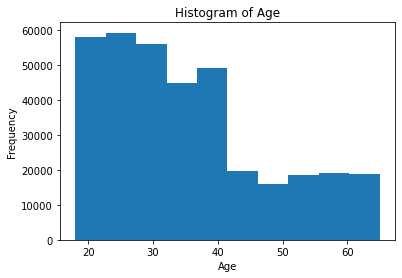

In [61]:
#EDA

# Create a histogram of a age column
plt.hist(merged_df_3['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
#High frequency among young people

In [66]:
merged_df_3['Profit'] = merged_df_3['Price Charged'] - merged_df_3['Cost of Trip']

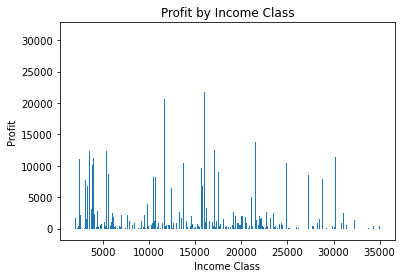

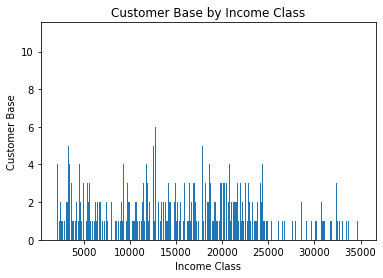

In [74]:
# How does Income Class wise Profit and customer base?
Analysis
income_class_profit = merged_df_3.groupby('Income (USD/Month)')['Profit'].sum()
income_class_customer_base = merged_df_3.groupby('Income (USD/Month)')['Customer ID'].nunique()

# Bar plot for profit by income class
plt.bar(income_class_profit.index, income_class_profit)
plt.xlabel('Income Class')
plt.ylabel('Profit')
plt.title('Profit by Income Class')
plt.show()

# Bar plot for customer base by income class
plt.bar(income_class_customer_base.index, income_class_customer_base)
plt.xlabel('Income Class')
plt.ylabel('Customer Base')
plt.title('Customer Base by Income Class')
plt.show()


Middle class and high class contributes more in the profit and in the customer base

### Hypothesis


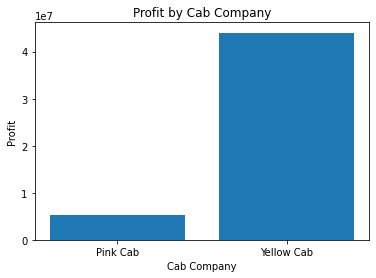

In [76]:
### Hypothesis 1: Profitability varies based on the cab company.

## Calculate total profit by cab company
profit_by_company = merged_df_3.groupby('Company')['Profit'].sum()

# Bar plot for profit by cab company
plt.bar(profit_by_company.index, profit_by_company)
plt.xlabel('Cab Company')
plt.ylabel('Profit')
plt.title('Profit by Cab Company')
plt.show()
# Profitability varies based on the cab company is correct

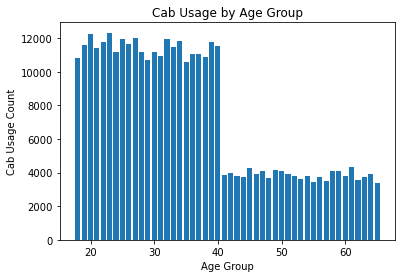

In [79]:
###Hypothesis 2: Customer demographics impact cab usage.
# Merge customer demographics with cab usage data

# Calculate cab usage count by age group
cab_usage_by_age_group = merged_df_3.groupby('Age')['Transaction ID'].count()

# Bar plot for cab usage by age group
plt.bar(cab_usage_by_age_group.index, cab_usage_by_age_group)
plt.xlabel('Age Group')
plt.ylabel('Cab Usage Count')
plt.title('Cab Usage by Age Group')
plt.show()
#Customer demographics impact cab usage is correct, yourgers are likely to use more cab usage.

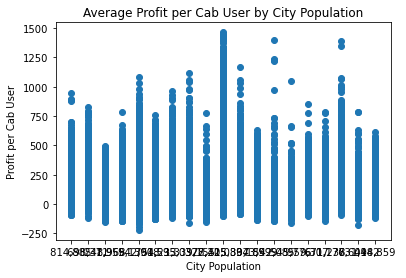

<Figure size 720x1440 with 0 Axes>

In [87]:
#Hypothesis 3: Average Profit per cab user is by city population
# Calculate average profit per cab user by city population
profit_per_user_by_population = merged_df_3.groupby('Population')['Profit'].mean()

# Scatter plot for average profit per cab user by city population
plt.scatter(merged_df_3['Population'], merged_df_3['Profit'])
plt.xlabel('City Population')
plt.ylabel('Profit per Cab User')
plt.title('Average Profit per Cab User by City Population')
plt.figure(figsize=(10, 20))
plt.show()



In [ ]:
#Cab demand varies seasonally, with higher demand during certain months or seasons.

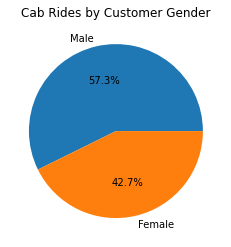

In [88]:
#Hypothesis 4: per cab user by customer gender

# Calculate the count of cab rides by customer gender
rides_by_gender = merged_df_3['Gender'].value_counts()

# Pie chart for cab rides by customer gender
plt.pie(rides_by_gender, labels=rides_by_gender.index, autopct='%1.1f%%')
plt.title('Cab Rides by Customer Gender')
plt.show()


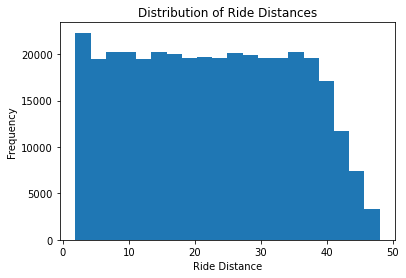

In [96]:
#Hypothesis 5: Customer analysis based on ride distance

# Calculate average ride distance by customer
avg_ride_distance_by_customer = merged_df_3.groupby('Customer ID')['KM Travelled'].mean()

# Plot distribution of ride distances
plt.hist(merged_df_3['KM Travelled'], bins=20)
plt.xlabel('Ride Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Distances')
plt.show()
# we can gain an understanding of the spread and concentration of ride distances